<a href="https://colab.research.google.com/github/IrizGem/Steganography/blob/main/Stega_Bruyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

fread = '/content/drive/MyDrive/NN/VOC2012/TestImages/pic.png'
fwrite = '/content/drive/MyDrive/NN/VOC2012/TestImages/stegomod.png'

block_size = 8
alpha = 0.02

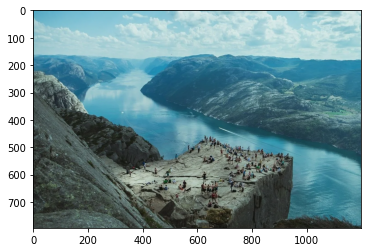

"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"
99 символов -> 792 бит
размер изображения -> ( 795 x 1199 )


In [ ]:
# Чтение файла
img = mpimg.imread(fread)
img = np.copy(img)
plt.imshow(img)
plt.show()

# Задание последовательности
mess = '"Do not you feel a great inclination, Miss Bennet, to seize such an opportunity of dancing a reel?"'
#mess = 'dancing a reel'
bits=''
for ch in mess:
  bits+=format(ord(ch), "08b")
print(mess)

print(len(mess), "символов ->", len(bits), "бит")
print("размер изображения -> (" ,img.shape[0], "x", img.shape[1], ")")

l_b = len(bits)
w = img.shape[1]
h = img.shape[0]
w_b = math.floor(w/block_size)
h_b = math.floor(h/block_size)

In [ ]:
def br_mask(image): # Создание маски по яркостям (без кривой и порога, просто пополам)
    a = np.zeros((block_size**2, 3))
    n = 0
    for i in range(block_size):
        for j in range(block_size):
            a[n][0]=i
            a[n][1]=j
            r, g, b = img[j, i, 0:3]
            a[n][2]=r*0.299+g*0.587+b*0.114
            n+=1

    a = a[np.argsort(a[:, 2])]
    b_mask = np.zeros((block_size, block_size))
    for b in a[0:math.floor(block_size**2/2)]:
        i = math.floor(b[0])
        j = math.floor(b[1])
        #print(i, j)
        b_mask[i][j] = 1
    return b_mask

In [ ]:
def mask(): # Создание случайной маски
    m = np.zeros((block_size, block_size))
    for i in range(block_size):
        for j in range(block_size):
            m[i][j] =  random.randrange(0, 2, 1)
    return m

In [ ]:
def brightness(image, mask): # Определение яркости блока
    br = 0
    c = np.sum(mask)
    
    for i in range(block_size):
        for j in range(block_size):
            r, g, b = image[j, i, 0:3]
            pix_br = r*0.299+g*0.587+b*0.114
            if (mask[i][j] == 1):
                br += pix_br
    br = br / c
    return  br

In [ ]:
def add_brightness(image, mask):
  for i in range(block_size):
      for j in range(block_size):
        if mask[i, j]<=0:
          continue
        r, g, b = image[j, i, 0:3] + 1/255
        if r > 1:
          r = 1
        if g > 1:
          g = 1
        if b > 1:
          b = 1
        image[j, i, 0:3] = r, g, b
  return image


def remove_brightness(image, mask):
  for i in range(block_size):
      for j in range(block_size):
        if mask[i, j]<=0:
          continue
        r, g, b = image[j, i, 0:3] - 1/255
        if r < 0:
          r = 0
        if g < 0:
          g = 0
        if b < 0:
          b = 0
        image[j, i, 0:3] = r, g, b
  return image


In [ ]:
image = img
x = 1
y = 1

r_mask = mask()
block_mask = br_mask(img[y:y+block_size, x:x+block_size, :])

mask_1_a = 1*np.logical_and(r_mask, np.logical_not(block_mask))
mask_2_a = 1*np.logical_and(np.logical_not(r_mask), np.logical_not(block_mask))
mask_1_b = 1*np.logical_and(r_mask, block_mask)
mask_2_b = 1*np.logical_and(np.logical_not(r_mask), block_mask)

#print('Starting')
#print(image[y:y+block_size, x:x+block_size, :])
image[y:y+block_size, x:x+block_size, :] = add_brightness(image[y:y+block_size, x:x+block_size, :], mask_2_a)
#print('Result')
#print(image[y:y+block_size, x:x+block_size, :])

image[y:y+block_size, x:x+block_size, :] = add_brightness(image[y:y+block_size, x:x+block_size, :], mask_2_a)
#print('Result')
#print(image[y:y+block_size, x:x+block_size, :])

image[y:y+block_size, x:x+block_size, :] = add_brightness(image[y:y+block_size, x:x+block_size, :], mask_2_a)
#print('Result')
#print(image[y:y+block_size, x:x+block_size, :])


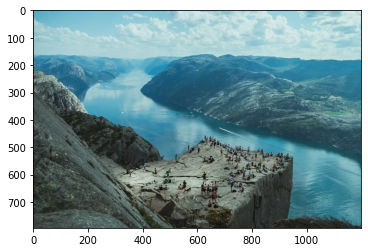

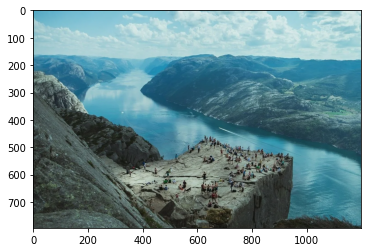

In [ ]:
# Кодирование
r_mask = mask()
m_i = 0

for i in range(w_b-1):
  for j in range(h_b-1):
    if m_i >= l_b:
      break
    
    x = i*block_size
    y = j*block_size

    block_mask = br_mask(img[y:y+block_size, x:x+block_size, :])

    mask_1_a = 1*np.logical_and(r_mask, np.logical_not(block_mask))
    mask_2_a = 1*np.logical_and(np.logical_not(r_mask), np.logical_not(block_mask))
    mask_1_b = 1*np.logical_and(r_mask, block_mask)
    mask_2_b = 1*np.logical_and(np.logical_not(r_mask), block_mask)

    br_1_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_a)
    br_2_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_a)
    br_1_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_b)
    br_2_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_b)

    #print(br_1_a, ' ', br_2_a, ' ', br_1_b, ' ', br_2_b)
    #print(br_1_a-br_2_a)
    #print(br_1_b-br_2_b)

    bit = bits[m_i]
    if bit == '1':
      while br_1_a <= br_2_a or abs(br_1_a-br_2_a) < alpha:
        img[y:y+block_size, x:x+block_size, :] = add_brightness(img[y:y+block_size, x:x+block_size, :], mask_1_a)
        img[y:y+block_size, x:x+block_size, :] = remove_brightness(img[y:y+block_size, x:x+block_size, :], mask_2_a)
        br_1_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_a)
        br_2_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_a)
        
      while br_1_b <= br_2_b or abs(br_2_a-br_2_b) < alpha:
        img[y:y+block_size, x:x+block_size, :] = add_brightness(img[y:y+block_size, x:x+block_size, :], mask_1_b)
        img[y:y+block_size, x:x+block_size, :] = remove_brightness(img[y:y+block_size, x:x+block_size, :], mask_2_b)
        br_1_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_b)
        br_2_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_b)

    else:
      while br_1_a >= br_2_a or abs(br_1_a-br_2_a) < alpha:
        img[y:y+block_size, x:x+block_size, :] = remove_brightness(img[y:y+block_size, x:x+block_size, :], mask_1_a)
        img[y:y+block_size, x:x+block_size, :] = add_brightness(img[y:y+block_size, x:x+block_size, :], mask_2_a)
        br_1_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_a)
        br_2_a = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_a)
        
      while br_1_b >= br_2_b or abs(br_1_b-br_2_b) < alpha:
        img[y:y+block_size, x:x+block_size, :] = remove_brightness(img[y:y+block_size, x:x+block_size, :], mask_1_b)
        img[y:y+block_size, x:x+block_size, :] = add_brightness(img[y:y+block_size, x:x+block_size, :], mask_2_b)
        br_1_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_1_b)
        br_2_b = brightness(img[y:y+block_size, x:x+block_size, :], mask_2_b)

    m_i+=1
    #print(m_i)
  
  if m_i >= l_b:
    break


plt.imshow(img)
plt.show()
plt.imsave(fwrite, img)

img_empty = mpimg.imread(fread)
#plt.subplot(1,2,1)
#plt.subplot(1,2,2)
plt.imshow(img_empty)
plt.show()

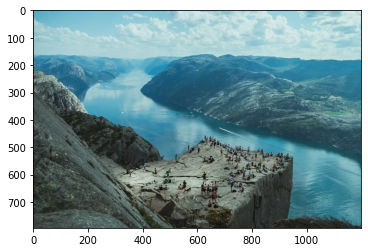

<<<RESULTS>>>
['00100010', '01000100', '01101111', '00100000', '01101110', '01101111', '01110100', '00100000', '01111001', '01101111', '01110101', '00100000', '01100110', '01100101', '01100101', '01101100', '00100000', '01100001', '00100000', '01100111', '01110010', '01100101', '01100001', '01110100', '00100000', '01101001', '01101110', '01100011', '01101100', '01101001', '01101110', '01100001', '01110100', '01101001', '01101111', '01101110', '00101100', '00100000', '01001101', '01101001', '01110011', '01110011', '00100000', '01000010', '01100101', '01101110', '01101110', '01100101', '01110100', '00101100', '00100000', '01110100', '01101111', '00100000', '01110011', '01100101', '01101001', '01111010', '01100101', '00100000', '01110011', '01110101', '01100011', '01101000', '00100000', '01100001', '01101110', '00100000', '01101111', '01110000', '01110000', '01101111', '01110010', '01110100', '01110101', '01101110', '01101001', '01110100', '01111001', '00100000', '01101111', '01100110', '

In [ ]:
# Декодирование
img_a = mpimg.imread(fwrite)
img_a = np.copy(img_a)

imgplot = plt.imshow(img_a)
plt.show()

bits_a = ''
m_i=0
for i in range(w_b-1):
  for j in range(h_b-1):
    if m_i >= l_b:
      break
    
    x = i*block_size
    y = j*block_size

    block_mask = br_mask(img_a[y:y+block_size, x:x+block_size, :])

    mask_1_a = 1*np.logical_and(r_mask, np.logical_not(block_mask))
    mask_2_a = 1*np.logical_and(np.logical_not(r_mask), np.logical_not(block_mask))
    mask_1_b = 1*np.logical_and(r_mask, block_mask)
    mask_2_b = 1*np.logical_and(np.logical_not(r_mask), block_mask)

    br_1_a = brightness(img_a[y:y+block_size, x:x+block_size, :], mask_1_a)
    br_2_a = brightness(img_a[y:y+block_size, x:x+block_size, :], mask_2_a)
    br_1_b = brightness(img_a[y:y+block_size, x:x+block_size, :], mask_1_b)
    br_2_b = brightness(img_a[y:y+block_size, x:x+block_size, :], mask_2_b)

    bit = '0'

    da = br_1_a - br_2_a
    db = br_1_b - br_2_b

    if (abs(da) < abs(db) and db > 0) or (abs(da) > abs(db) and db > 0):
      bit = '1'
    #print('+', bit)
    bits_a+=bit
    m_i+=1
  
  if m_i >= l_b:
    break

syms_a = [ bits_a[bit:bit+8] for bit in range(0, len(bits_a), 8) ]
syms = [ bits[bit:bit+8] for bit in range(0, len(bits), 8) ]


print("<<<RESULTS>>>")
print(syms)
print(syms_a)

mess_a = ""
mess = ""
for i in range(len(syms_a)):
  mess_a +=chr(int(syms_a[i], 2))
  mess +=chr(int(syms[i], 2))

print()
print("Начальное сообщение: ", mess)
print(" Итоговое сообщение: ", mess_a)

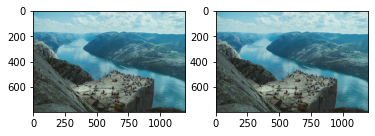

MAX D
0.13725492
MSE
0.03429781173337274
Lp, p = 1 .. 4
[-6.32293614e-05  3.39415509e-06             nan  2.65263099e-07]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power


In [ ]:
# Метрики для изображений

img =  mpimg.imread(fwrite)
img_empty = mpimg.imread(fread)
img_empty = np.copy(img_empty)

plt.subplot(1,2,2)
plt.imshow(img_empty)

plt.subplot(1,2,1)
plt.imshow(img)
plt.show()

w = img.shape[1]
h = img.shape[0]

MAX_D = np.max(img-img_empty)
print("MAX D")
print(MAX_D)

MSE = 1 / (w * h) * ((np.sum(img_empty-img)) ** 2)
print("MSE")
print(MSE)

Lp = np.zeros(4)
Lp[0] = (np.sum((img_empty-img)**1)**(1/1))/(w*h*3)
Lp[1] = (np.sum((img_empty-img)**2)**(1/2))/(w*h*3)
Lp[2] = (np.sum((img_empty-img)**3)**(1/3))/(w*h*3)
Lp[3] = (np.sum((img_empty-img)**4)**(1/4))/(w*h*3)
print("Lp, p = 1 .. 4")
print(Lp)